In [4]:
#!pip install fastai --upgrade

In [5]:
from fastai.vision.all import *

In [ ]:
path = untar_data(URLs.CAMVID_TINY)
path.ls()

In [ ]:
codes = np.loadtxt(path/'codes.txt', dtype=str)
codes

## Segmentation - Using the high-level API

`get_image_files` function helps us grab all the image filenames

In [ ]:
fnames = get_image_files(path/"images")
fnames[0]

In [ ]:
# Look at labels folder
(path/"labels").ls()[0]

Segmentation masks have the same base names as the images but with an extra `_P`, so we can define a label function:
```python
def label_func(fn):
  return path/"labels"/f"{fn.stem}_{fn.suffix}"
```

We can then gather our data using `SegmentationDataLoaders`:

In [ ]:
def label_func(fn):
  return path/"labels"/f"{fn.stem}_P{fn.suffix}"

In [ ]:
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = fnames, label_func = label_func, codes=codes
)

In [ ]:
dls.show_batch(max_n=6)

In [ ]:
learn = unet_learner(dls, resnet34)
learn.fine_tune(6)

In [ ]:
learn.show_results(max_n=6, figsize=(7,8))

## Attempt to access CityScapes data with high-level API

In [6]:
path = Path("/content/drive/MyDrive/Career Materials 2020/fellowship.ai/data")
path.ls()

(#9) [Path('/content/drive/MyDrive/Career Materials 2020/fellowship.ai/data/gtFine_trainvaltest.zip'),Path('/content/drive/MyDrive/Career Materials 2020/fellowship.ai/data/gtCoarse.zip'),Path('/content/drive/MyDrive/Career Materials 2020/fellowship.ai/data/leftImg8bit_trainvaltest.zip'),Path('/content/drive/MyDrive/Career Materials 2020/fellowship.ai/data/leftImg8bit'),Path('/content/drive/MyDrive/Career Materials 2020/fellowship.ai/data/gtFine'),Path('/content/drive/MyDrive/Career Materials 2020/fellowship.ai/data/README'),Path('/content/drive/MyDrive/Career Materials 2020/fellowship.ai/data/license.txt'),Path('/content/drive/MyDrive/Career Materials 2020/fellowship.ai/data/gtFine_trainvaltest'),Path('/content/drive/MyDrive/Career Materials 2020/fellowship.ai/data/leftImg8bit_trainvaltest')]

In [7]:
# import namedtuple with code names
from labels import labels

In [8]:
# Only include codes that should be evaluated
cityscapes_codes = np.array([label.name for label in labels if not label.ignoreInEval])
cityscapes_codes

array(['road', 'sidewalk', 'building', 'wall', 'fence', 'pole',
       'traffic light', 'traffic sign', 'vegetation', 'terrain', 'sky',
       'person', 'rider', 'car', 'truck', 'bus', 'train', 'motorcycle',
       'bicycle'], dtype='<U13')

In [9]:
fnames = get_image_files(path/"leftImg8bit")
fnames[0]

Path('/content/drive/MyDrive/Career Materials 2020/fellowship.ai/data/leftImg8bit/train/jena/jena_000078_000019_leftImg8bit.png')

In [10]:
len(fnames) # as expected

5000

In [11]:
def label_func(fn):
  label_fn = str(fn).replace('leftImg8bit', 'gtFine')[:-4] + "_color.png"
  return Path(label_fn)

In [12]:
dls = SegmentationDataLoaders.from_label_func(
    path, bs=1, fnames = fnames, label_func = label_func, codes = cityscapes_codes
)

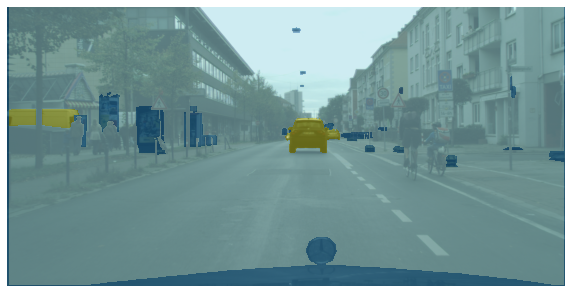

In [13]:
dls.show_batch(max_n=1, figsize=(10,7))

In [14]:
learn = unet_learner(dls, resnet34)
learn.fine_tune(1)

IndexError: ignored

In [ ]:
learn.show_results(max_n=6, figsize=(7,8))